In [3]:
#!pip install mne

In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# subject 0, night 0
file = "sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# metadata
info = data.info
channels = data.ch_names
print("Metadata: \n ", data)
print(info)
print("Channels: ", channels)
#print("raw_data size: ", raw_data.shape)

Extracting EDF parameters from c:\Users\flake\Documents\Homework\CSCI5622\Project Work\sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Metadata: 
  <RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>
Channels:  ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [3]:
# extract each channel
EEG_Cz = raw_data[0] * 1000000
EEG_Oz = raw_data[1] * 1000000
EOG = raw_data[2] * 1000000
Resp = raw_data[3]
EMG = raw_data[4]
Temp = raw_data[5]
Event = raw_data[6]

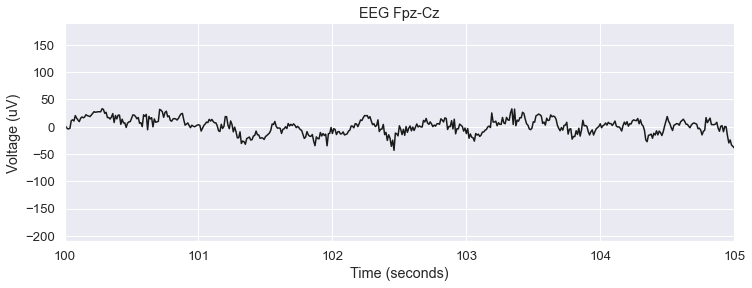

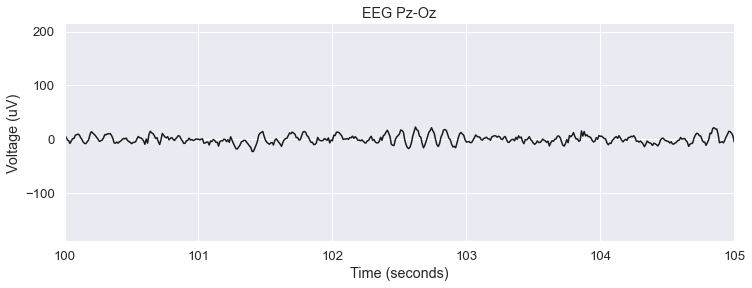

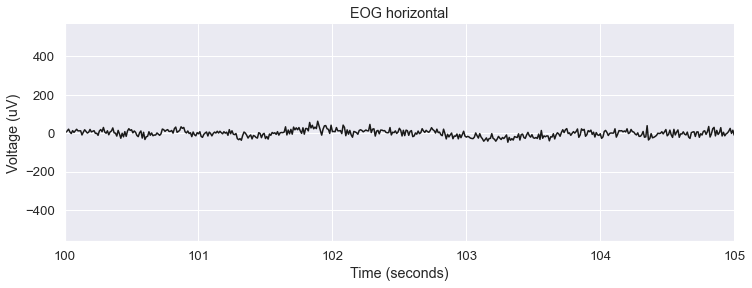

In [4]:
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 100.
time = np.arange(EEG_Cz.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, EEG_Cz, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (uV)')
plt.xlim([100, 105])
plt.title('EEG Fpz-Cz')
sns.despine()

time = np.arange(EEG_Oz.size) / sf
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, EEG_Oz, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (uV)')
plt.xlim([100, 105])
plt.title('EEG Pz-Oz')
sns.despine()

time = np.arange(EOG.size) / sf
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, EOG, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (uV)')
plt.xlim([100, 105])
plt.title('EOG horizontal')
sns.despine()



In [6]:
#!pip install scikit-learn

In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [65]:
mod = GaussianProcessRegressor()
n = int(len(time)/1000)
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]

In [66]:
mod.fit(X,Y)

GaussianProcessRegressor()

In [68]:
y_hat = mod.predict(X)

In [69]:
import matplotlib.pyplot as plt

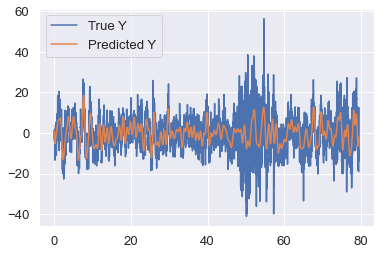

In [71]:
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])

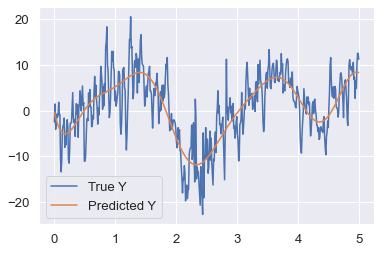

In [80]:
mod = GaussianProcessRegressor(alpha=1e-5)
n = 500
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])

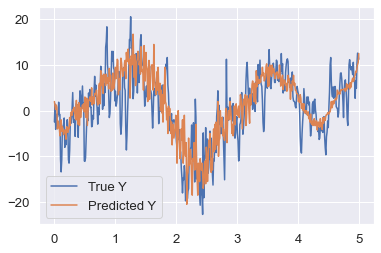

In [79]:
mod = GaussianProcessRegressor(alpha=1e-14)
n = 500
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])

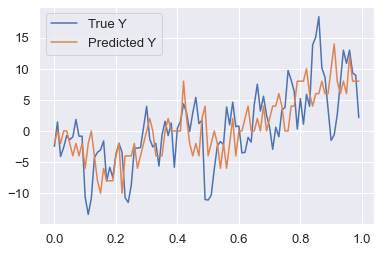

In [109]:
mod = GaussianProcessRegressor(alpha=2.5e-15)
n = 100
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])

In [94]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

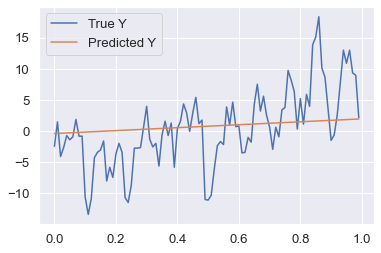

In [105]:
kernel = DotProduct() + WhiteKernel(noise_level=0.1)
mod = GaussianProcessRegressor(kernel = kernel)
n = 100
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])